<p>This notebook requires images in a directory with the following structure:
<code>
signs
    test
        stop
        no-vehicles
    train
        vehicles
        no-vehicles
</code>

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing import image

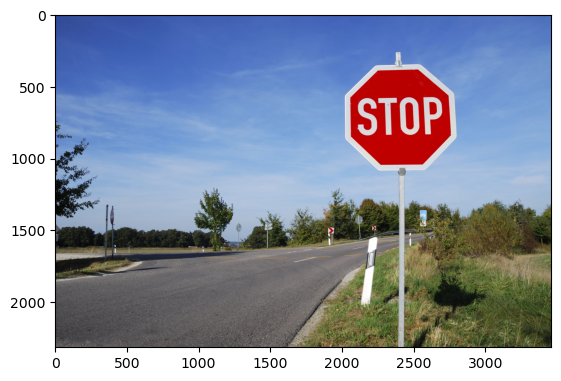

In [4]:
car1 = cv2.imread('signs/train/stop/2.jpg')
car1 = cv2.cvtColor(car1,cv2.COLOR_BGR2RGB)
plt.imshow(car1)

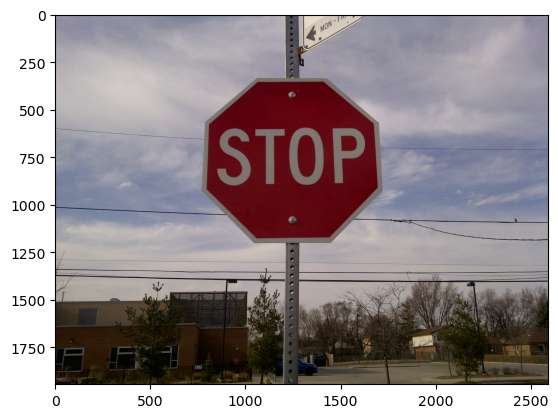

In [5]:
car2 = cv2.imread('signs/test/stop/8.jpg')
car2 = cv2.cvtColor(car2,cv2.COLOR_BGR2RGB)
plt.imshow(car2)

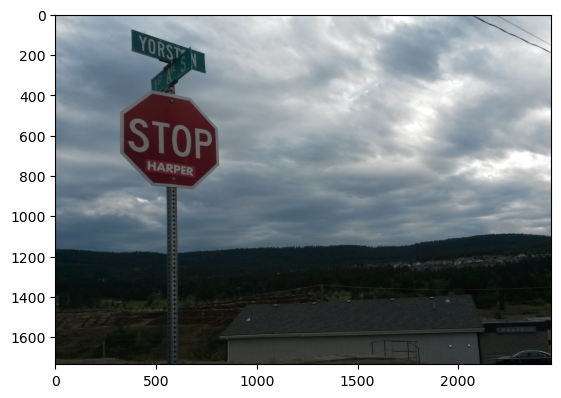

In [6]:
car3 = cv2.imread('signs/test/stop/10.jpg')
car3 = cv2.cvtColor(car3,cv2.COLOR_BGR2RGB)
plt.imshow(car3)

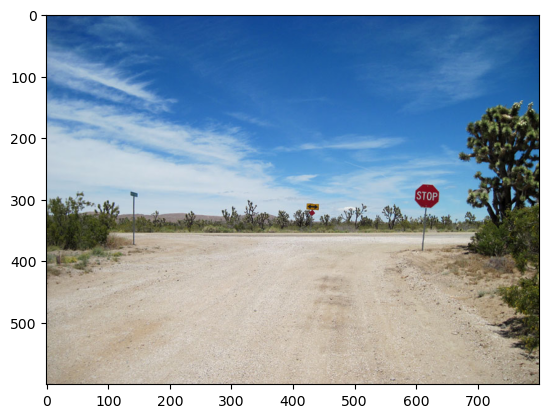

In [7]:
car4 = cv2.imread('signs/test/stop/28.jpg')
car4 = cv2.cvtColor(car4,cv2.COLOR_BGR2RGB)
plt.imshow(car4)

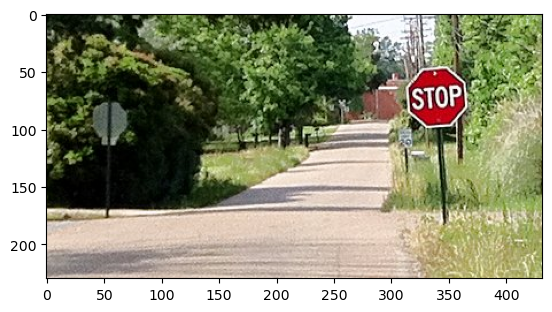

In [8]:
car5 = cv2.imread('signs/test/stop/43.jpg')
car5 = cv2.cvtColor(car5,cv2.COLOR_BGR2RGB)
plt.imshow(car5)

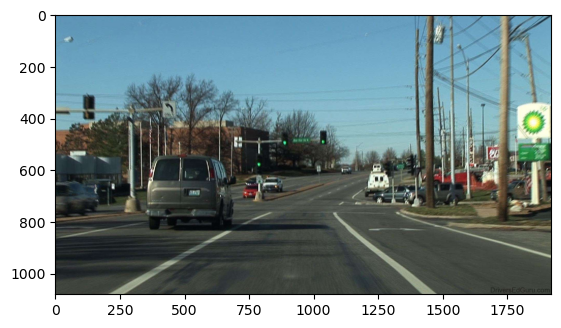

In [10]:
ncar1 = cv2.imread('signs/test/no-stop/102.jpg')
ncar1 = cv2.cvtColor(ncar1,cv2.COLOR_BGR2RGB)
plt.imshow(ncar1)

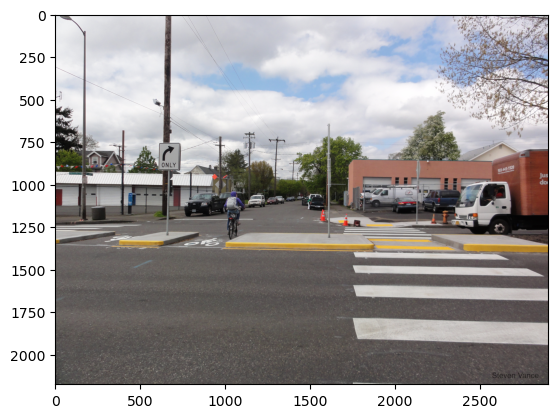

In [11]:
ncar2 = cv2.imread('signs/test/no-stop/111.jpg')
ncar2 = cv2.cvtColor(ncar2,cv2.COLOR_BGR2RGB)
plt.imshow(ncar2)

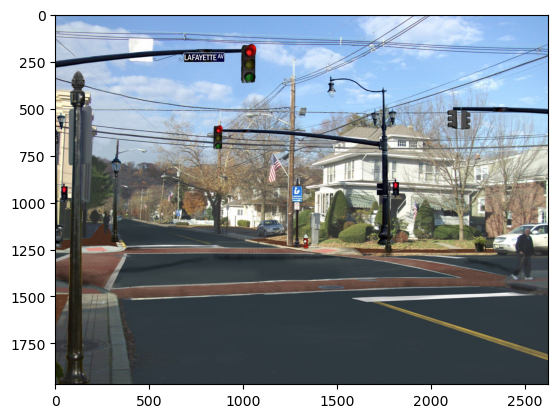

In [12]:
ncar3 = cv2.imread('signs/test/no-stop/129.jpg')
ncar3 = cv2.cvtColor(ncar3,cv2.COLOR_BGR2RGB)
plt.imshow(ncar3)

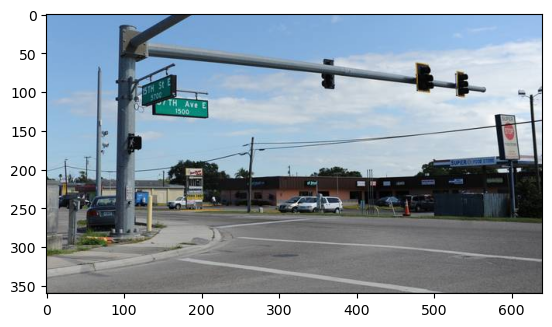

In [13]:
ncar4 = cv2.imread('signs/test/no-stop/133.jpg')
ncar4 = cv2.cvtColor(ncar4,cv2.COLOR_BGR2RGB)
plt.imshow(ncar4)

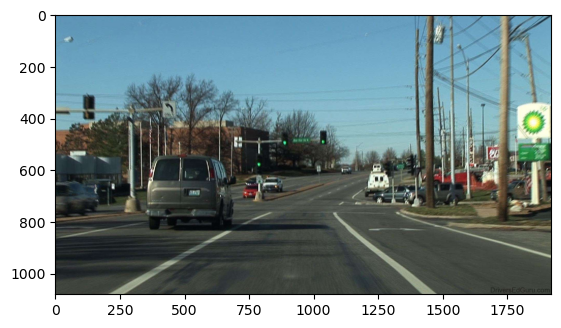

In [23]:
plt.imshow(ncar1)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
image_gen = ImageDataGenerator(rotation_range=5, # rotate the image 5 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 10%
                               height_shift_range=0.2, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalizing it.
                               shear_range=0.02, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.02, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

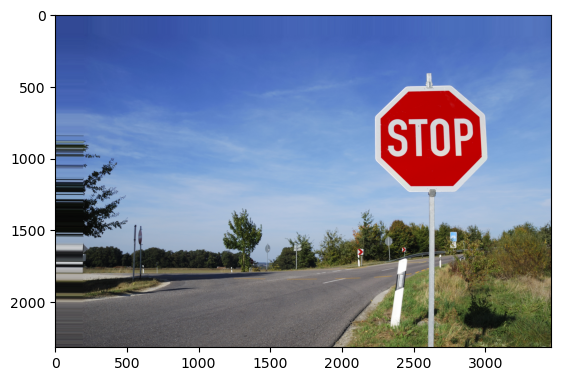

In [21]:
plt.imshow(image_gen.random_transform(car1))

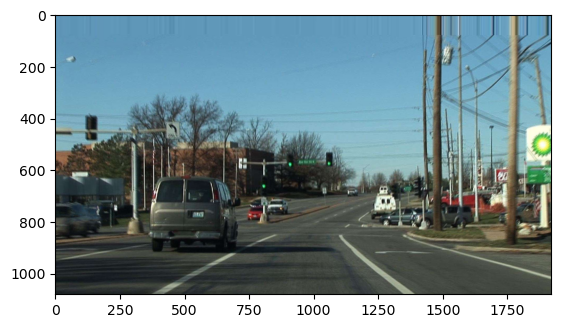

In [24]:
plt.imshow(image_gen.random_transform(ncar1))

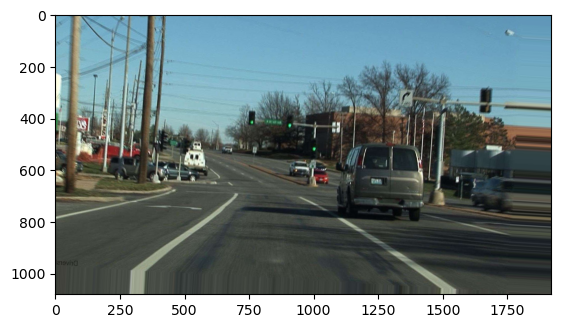

In [25]:
plt.imshow(image_gen.random_transform(ncar1))

In [26]:
print('image shapes. ',car1.shape,' no sign: ',ncar1.shape)

image shapes.  (2316, 3460, 3)  no sign:  (1080, 1920, 3)


In [27]:
source_dir = 'signs/train'
image_gen.flow_from_directory(source_dir) 

Found 197 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [28]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [29]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [30]:
model = Sequential()
model.reset_states() # not sure when I should do this. 

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2023-10-25 00:43:37.162376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-25 00:43:37.163325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ali/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-11.4/lib64
2023-10-25 00:43:37.190780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ali/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-11.4/lib64
2023-10-25 00:43:37.196700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

### Training the Model

In [32]:
batch_size = 10
train_set = 'signs/train'
train_image_gen = image_gen.flow_from_directory(train_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 197 images belonging to 2 classes.


In [33]:
test_set = 'signs/test'
test_image_gen = image_gen.flow_from_directory(test_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 197 images belonging to 2 classes.


In [34]:
train_image_gen.class_indices

{'no-stop': 0, 'stop': 1}

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
epochs = 50

In [37]:
# model.reset_states() # not sure when I should do this. It doesn't actually reset anything!
results = model.fit_generator(train_image_gen,epochs=epochs,
                              steps_per_epoch=10,
                              validation_data=test_image_gen,
                              validation_steps=10)

Epoch 1/50


2023-10-25 00:44:06.192127: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28037120 exceeds 10% of free system memory.
2023-10-25 00:44:08.146397: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29297664 exceeds 10% of free system memory.


 1/10 [==>...........................] - ETA: 45s - loss: 0.6704 - accuracy: 0.7000

2023-10-25 00:44:08.365103: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29859840 exceeds 10% of free system memory.
2023-10-25 00:44:08.438689: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 28037120 exceeds 10% of free system memory.


 2/10 [=====>........................] - ETA: 1s - loss: 1.0982 - accuracy: 0.5294 

2023-10-25 00:44:08.589355: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29297664 exceeds 10% of free system memory.


10/10 [==============================] - 24s 2s/step - loss: 0.9096 - accuracy: 0.6082 - val_loss: 0.7862 - val_accuracy: 0.5300
Epoch 2/50
10/10 [==============================] - 14s 1s/step - loss: 0.7198 - accuracy: 0.4227 - val_loss: 0.6877 - val_accuracy: 0.4600
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 0.6827 - accuracy: 0.5361 - val_loss: 0.6755 - val_accuracy: 0.5600
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 0.6826 - accuracy: 0.5100 - val_loss: 0.6604 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 15s 2s/step - loss: 0.6563 - accuracy: 0.5700 - val_loss: 0.6194 - val_accuracy: 0.4800
Epoch 6/50
10/10 [==============================] - 14s 1s/step - loss: 0.6750 - accuracy: 0.6100 - val_loss: 0.6498 - val_accuracy: 0.7300
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 0.6217 - accuracy: 0.7216 - val_loss: 0.5717 - val_accuracy: 0.6500
Epoch 8/50
10/10 [=============

In [38]:
model.save('signs.h5')

# Evaluating the Model

In [39]:
results.history['accuracy'][epochs-1] # ending accuracy

0.8999999761581421

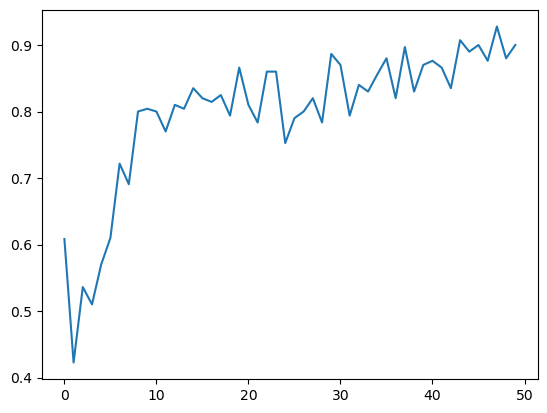

In [40]:
plt.plot(results.history['accuracy'])

# Predicting on new images

In [41]:
train_image_gen.class_indices

{'no-stop': 0, 'stop': 1}

1/1 [==============================] - 0s 25ms/step
Probability that image is a stop sign is: [[1.]] 


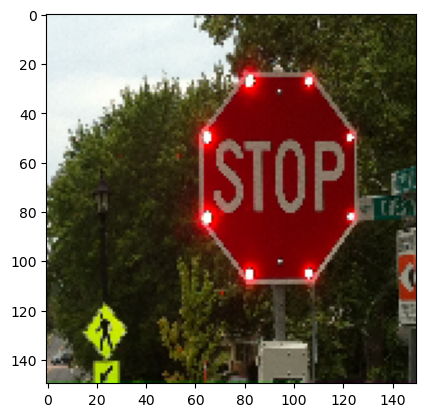

In [47]:
vehicle_file = 'signs/test/stop/18.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 27ms/step
Probability that image is a stop sign is: [[0.6941948]] 


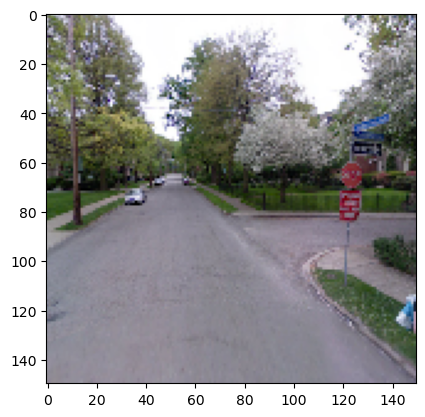

In [43]:
vehicle_file = 'signs/test/stop/51.png'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 26ms/step
Probability that image is a stop sign is: [[0.7252604]] 


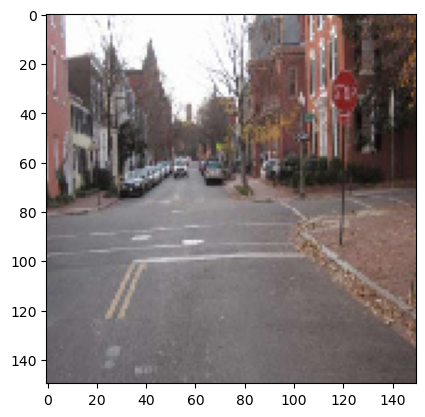

In [46]:
vehicle_file = 'signs/test/stop/56.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 25ms/step
Probability that image is a stop sign is: [[0.98832774]] 


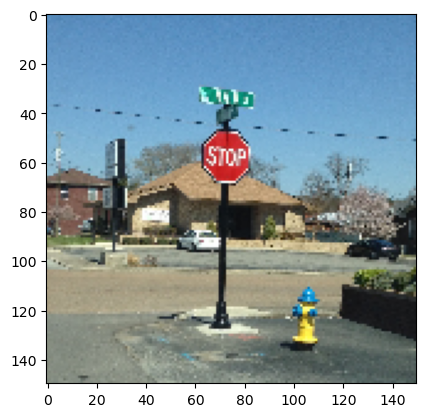

In [48]:
vehicle_file = 'signs/test/stop/32.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

 Find an image of a street without a stop sign or with a stop sign that will be incorrectly classified by your classifier. Seal of the city of East Palo Alto.  



1/1 [==============================] - 0s 31ms/step
Probability that image is a no-stop sign is: [[0.06618981]] 


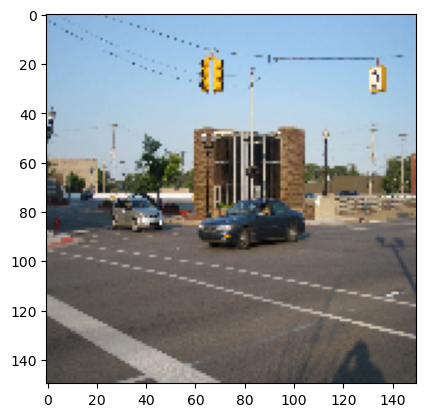

In [50]:
vehicle_file = 'signs/test/no-stop/105.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a no-stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 25ms/step
Probability that image is a no-stop sign is: [[0.15964894]] 


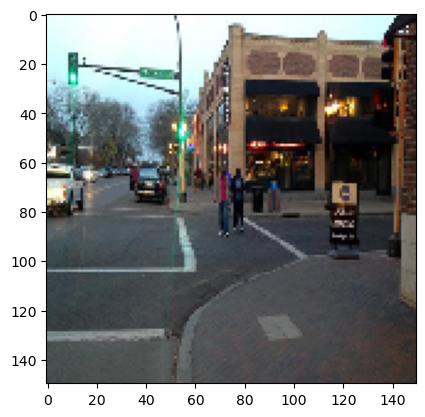

In [51]:
vehicle_file = 'signs/test/no-stop/110.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a no-stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 25ms/step
Probability that image is a no-stop sign is: [[0.00052754]] 


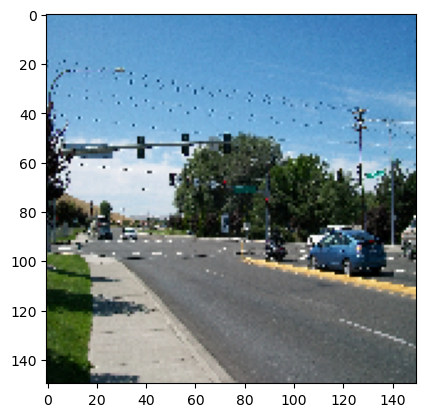

In [54]:
vehicle_file = 'signs/test/no-stop/116.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a no-stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 25ms/step
Probability that image is a no-stop sign is: [[0.02262614]] 


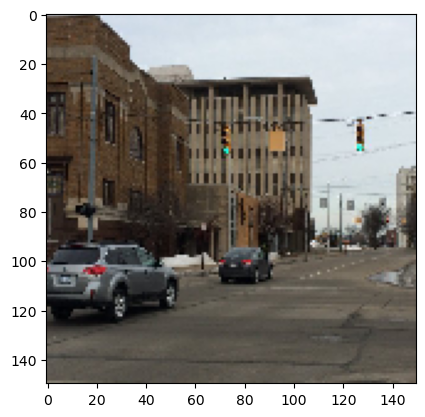

In [56]:
vehicle_file = 'signs/test/no-stop/155.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a no-stop sign is: {prediction_prob} ')

1/1 [==============================] - 0s 25ms/step
Probability that image is a stop sign online is: [[1.]] 


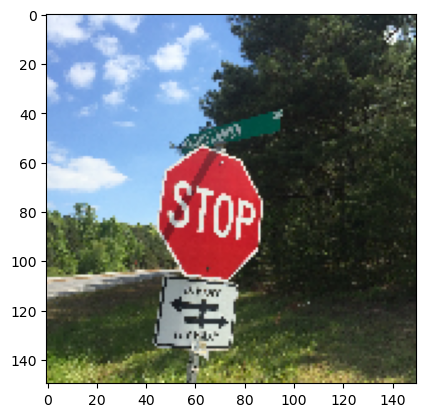

In [58]:
vehicle_file = 'signs/test/stop sign online and classify it correctly/stop sign online.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign online is: {prediction_prob} ')

1/1 [==============================] - 0s 25ms/step
Probability that image of a street without a stop sign is: [[0.4190641]] 


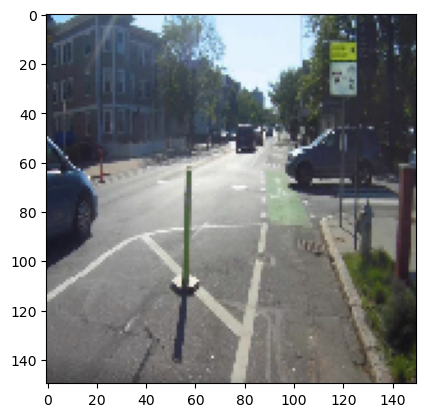

In [59]:
vehicle_file = 'signs/test/Image of a street without a stop sign/image of a street without a stop sign.jpg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image of a street without a stop sign is: {prediction_prob} ')